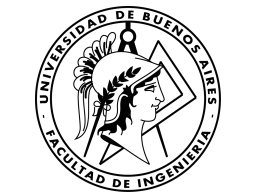

# Trabajo Práctico: Búsqueda de Raices

# Análisis Numérico
# 1er cuatrimestre de 2021

## Integrantes
Curso: 05 - Sassano

Grupo 17

- Mastricchio, Facundo Rodrigo - 100874
- Persia, Nahuel - 90772
- Zelechowski, Sergio - 86651


## Introducción

En este trabajo práctico desarrollamos los algoritmos para la búsqueda de raíces de funciones a través de los siguientes métodos numéricos aprendidos en la materia:

- Bisección
- Newton-Raphson
- Newton-Raphson modificado
- Secante


Con este fin, aplicamos uno de los métodos en un caso de uso de un área profesional; hallamos $ \pi $ aplicando uno de los métodos mencionados y hallamos las ráices de algunas funciones dadas. En este sentido, graficamos las funciones en Geogebra para tener una idea sobre ellas, corroborando que los intervalos brindados en el enunciado eran válidos para los métodos. Luego, obtenemos las raíces y con la historia de los resultados pasamos a revisar los distintos métodos, analizando los ordenes de convergencia, su conveniencia en tiempos de cómputo y error en el resultado.

## Objetivos

El objetivo principal del trabajo práctico es obtener la raíz de tres funciones dadas mediante los métodos numéricos indicados, para luego analizar el orden de convergencia $ P $ y la constante asintótica de cada método $ \lambda $. Por otro lado se hace un breve análisis del hallazgo de $ \pi $ por dos caminos distintos.

## Funciones implementadas
A continuación se definen las funciones implementas utilizadas durante el desarrollo del presente trabajo práctico.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')
# Util para poder ver mas decimales en los DF
# Lo seteo en 15 por las 15 cifras significativos de arq 64-bits
pd.set_option("display.precision", 15)

In [ ]:
def biseccion(f, a, b, tolerancia, max_iteraciones):
  """
  Metodo de la biseccion.
  Devuelve un DataFrame con los resultados obtenidos.
  f: funcion a analizar.
  a: extremo menor del intervalo.
  b: extremo mayor del intervalo.
  tolerancia: tol maxima.
  max_iteraciones: maxima cantidad de iteraciones.
  """

  # Tabla de los resultados
  df = pd.DataFrame(columns=['pn', 'error'])

  # Condicion inicial, chequeamos por Bolzano
  if f(a) * f(b) >= 0:
    print('No existe una raiz en ese intervalo')
    return df
  
  p_anterior = a
  i = 1
  
  while i <= max_iteraciones:
    p_candidata = (a + b) / 2
    error = abs(p_candidata - p_anterior)
    df = df.append({'pn': p_candidata, 'error': error}, ignore_index=True)
    # Criterio de paro | p_n+1 - p_n | < tolerancia
    if error < tolerancia:
      return df
    # Si da < 0, entonces el intervalo nuevo sera (a, p_candidata)
    if f(a) * f(p_candidata) < 0:
      b = p_candidata
    # De lo contrario, el intervalo nuevo sera (p_candidata, b) 
    else:
      a = p_candidata
    i += 1
    # Guardo la p_candidata para no perderla en la prox. iteracion y comparar rapido
    p_anterior = p_candidata

  print('No converge biseccion para esos parametros')
  return df


LIMITE_CERO = 1E-15
def newton_raphson(f, f_derivada, tolerancia, max_iteraciones, semilla):
  '''
  Devuelve un DataFrame con la historia de las iteraciones
  f: funcion a analizar.
  f_derivada: derivada de la funcion f. No se debe anular en ningun momento.
  tolerancia: tolerancia maxima.
  max_iteraciones: maxima cantidad de iteraciones
  semilla: p_n inicial, debe estar cerca de la raiz original.
  '''
  p_anterior = semilla
  df = pd.DataFrame(columns=['pn', 'error'])

  i = 1

  while i < max_iteraciones:
    # Revisamos que la derivada no sea 0 o muy proxima a 0
    if abs(f_derivada(p_anterior)) < LIMITE_CERO:
      print('La derivada en NR se anula en la iteracion: ', i)
      return df
    p_candidata = p_anterior - (f(p_anterior) / f_derivada(p_anterior))
    # Criterio de paro | p_n+1 - p_n | < tolerancia
    error = abs(p_candidata - p_anterior)
    df = df.append({'pn': p_candidata, 'error': error}, ignore_index=True)
    if error < tolerancia:
      if error < LIMITE_CERO:
        df.iat[i - 1, 1] = 1E-15
      return df
    i += 1
    # Actualizo para poder comparar mas rapido en la sig. iteracion
    p_anterior = p_candidata 
  
  print('No converge NR para esos parametros')
  return df

def newton_raphson_modificado(f, f_d_primera, f_d_segunda, tolerancia, max_iteraciones, semilla):
  '''
  Devuelve un DataFrame con la historia de las iteraciones
  f: funcion a analizar.
  f_d_primera: derivada primera de la funcion f.
  f_d_segunda: derivada segunda de la funcion f.
  tolerancia: tolerancia maxima.
  max_iteraciones: maxima cantidad de iteraciones
  semilla: p_n inicial, debe estar cerca de la raiz original.
  '''
  p_anterior = semilla
  df = pd.DataFrame(columns=['pn', 'error'])

  i = 1

  while i < max_iteraciones:
    # Revisamos que el denominador no sea 0 o muy proxima a 0
    if abs((f_d_primera(p_anterior) ** 2 - f(p_anterior) * f_d_segunda(p_anterior))) < LIMITE_CERO:
      print('El denominador en NR modificado se anula en la iteracion: ', i)
      return df
    p_candidata = p_anterior - (f(p_anterior) * f_d_primera(p_anterior)) / (f_d_primera(p_anterior) ** 2 - f(p_anterior) * f_d_segunda(p_anterior))
    # Criterio de paro | p_n+1 - p_n | < tolerancia
    error = abs(p_candidata - p_anterior)
    df = df.append({'pn': p_candidata, 'error': error}, ignore_index=True)
    if error < tolerancia:
      if error < LIMITE_CERO:
        df.iat[i - 1, 1] = 1E-15
      return df
    i += 1
    # Actualizo para poder comparar mas rapido en la sig. iteracion
    p_anterior = p_candidata 
  
  print('No converge NR modificado para esos parametros')
  return df

def secante(f, p0, p1, tolerancia, max_iteraciones):
  '''
  f: funcion a analizar.
  p0: semilla 0. Debe ser p0 < p1
  p1: semilla 1. Debe ser p1 > p0. Ambas semillas deben estar cerca de la raiz original.
  tolerancia: tolerancia maxima.
  max_iteraciones: maxima cantidad de iteraciones
  '''
  p_anterior_2 = p0
  p_anterior_1 = p1

  df = pd.DataFrame(columns=['pn', 'error'])

  i = 1
  while i < max_iteraciones:
    # Revisamos que el denominador no sea 0 o muy proxima a 0
    if abs(f(p_anterior_1) - f(p_anterior_2)) < LIMITE_CERO:
      print('El denominador en secante se anula en la iteracion: ', i)
      return df
    p_candidata = p_anterior_1 - ((f(p_anterior_1) * (p_anterior_1 - p_anterior_2)) / (f(p_anterior_1) - f(p_anterior_2)))
    # Criterio de paro | p_n+1 - p_n | < tolerancia
    error = abs(p_candidata - p_anterior_1)
    df = df.append({'pn': p_candidata, 'error': error}, ignore_index=True)
    if error < tolerancia:
      if error < LIMITE_CERO:
        df.iat[i - 1, 1] = 1E-15
      return df
    i += 1
    # Actualizo para poder comparar mas rapido en la sig. iteracion
    p_anterior_2 = p_anterior_1
    p_anterior_1 = p_candidata 
  
  print('No converge secante para esos parametros')
  return df


##### Orden de convergencia y constante asintotica

def calcular_historia_orden_convergencia(historia):
  '''
  Devuelve el mismo DF agregando como columna historia del orden de convergencia
  historia: DF con la historia de las iteraciones. Debe tener suficientes datos
  para poder calcular el orden de convergencia.
  ''' 

  iteraciones = historia.shape[0]
  historia_alfa = np.full(iteraciones, None)

  for n in range(2, iteraciones):
    # Ejemplo, si n = 3 entonces alfa = log(|e3 / e2|) / log(|e2 / e1|)
    # Necesitamos los 2 anteriores
    # Entonces, en las 2 primeras iteraciones NO podemos calcular
    a = historia.iloc[n, 1]
    b = historia.iloc[n - 1, 1]
    c = historia.iloc[n - 2, 1]

    # Checkeamos que el logaritmo no se anule o tenga argumentos muy cerca de 0 que hagan
    # que el calculo de un valor no representativo
    if (np.abs(np.log10(np.abs(b / c))) < LIMITE_CERO) or (np.abs(b) < LIMITE_CERO) or (np.abs(c) < LIMITE_CERO) or (np.abs(a) < LIMITE_CERO) or (np.log10(np.abs(a / b)) / np.log10(np.abs(b / c))) > 2.5 \
        or (np.log10(np.abs(a / b)) / np.log10(np.abs(b / c))) < 0.3:
      continue
    else:
      historia_alfa[n] = np.log10(np.abs(a / b)) / np.log10(np.abs(b / c))
  
  historia['alfa'] = historia_alfa
  
  return historia

def calcular_historia_constante_asintotica(historia):
  '''
  Devuelve la historia con la historia de la constante asintotica
  agregada como columna.
  historia: historia de las iteraciones.
  '''
  iteraciones = historia.shape[0]
  historia_constante = np.full(iteraciones, None)

  for n in range(2, iteraciones):
    # Ejemplo: si n = 3 entonces const_lambda = | e3 | / (| e2 | ** alfa)
    numerador = historia.iloc[n, 1]
    alfa = historia.iloc[n, 2]
    if alfa is None:
      continue
    denominador = historia.iloc[n - 1, 1] ** alfa

    # Checkeamos que nada de 0 o se vaya de los limites que puede tomar la constante.
    if numerador < LIMITE_CERO or denominador < LIMITE_CERO or (numerador / denominador) < LIMITE_CERO or (numerador / denominador) > 1 \
        or (numerador / denominador) < 0.15:
      continue
    else:
      constante_lambda = numerador / denominador
      historia_constante[n] = constante_lambda
  
  historia['lambda'] = historia_constante
  return historia


## 1) Métodos para seres queridos

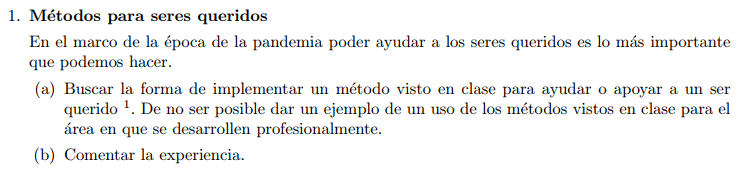

### Caso de estudio

El modelo elegido para modelar los métodos vistos en clases es un caso de la industria bancaria.
Las personas que acceden al home banking son, aproximadamente constantes, a excepcion del período correspondiente al pago de sueldos.

La función que modela este comportamiento es $ f(x) = \frac{1}{2}  (2x)^2 (30-2x)+250 $

En el eje Y se pueden ver los accesos al home banking (en miles de accesos) y en el eje X los días de estudio, siendo 0 el primer dia estudiado.

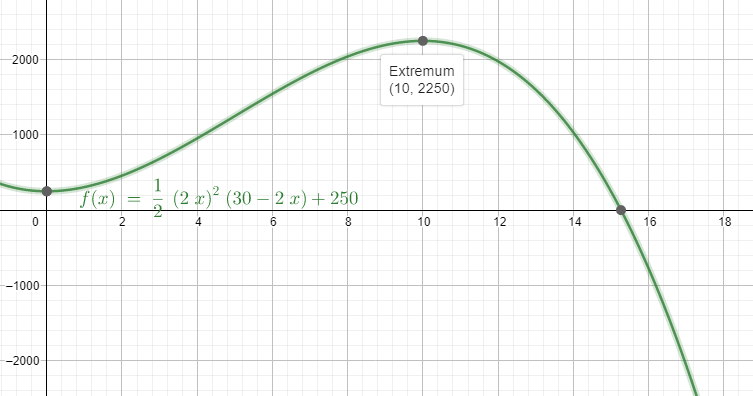

La característica de esta situación es que cuando los accesos superan el **1.5 millones**, la intraestructura dedicada no soporta la carga de trabajo y deja de atender. Para solucionar esto, existen diferentes alternativas:

- se puede alocar infraestructura suficiente para soportar esa carga, pero queda ociosa durante el resto del mes.
- se puede atender carga desde otros sistemas no críticos en los horarios de atención.

La alternativa elegida es la segunda, ya que al estar en ambientes virtualizados, apagar máquinas virtuales, crear nuevas y redistribuir cargas es simple y rápido, aunque no es automático, con lo cual se requiere de algún tiempo para realizarlo.

Al tratarse de un problema totalmente cíclico, aquí se necesita saber cuando se alcanza el millon de accesos, para que en ese período de tiempo se pueda llegar a alocar los recursos, para cuando se llegue al punto crítico de 1.5 millones.


Para esto, se calcula la raíz comprendida entre 4 y 5 para la función:

$ g(x) = \frac{1}{2}  (2x)^2 (30-2x)+250-1000 $

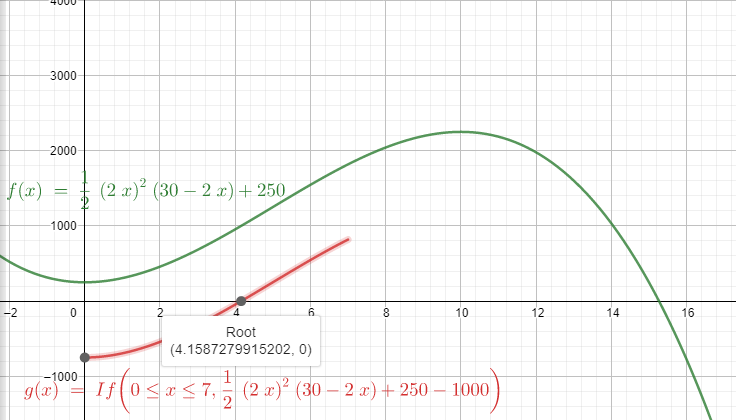

In [ ]:
def home_banking(x):
  return ((0.5)*((2*x)**2)*(30- (2*x) )) -750

def home_banking_derivado(x):
  return (-12)*(x-10)*(x)

newton_raphson(home_banking, home_banking_derivado, 1E-30, 10, 5)

,pn,error
0,4.166666666666667,0.833333333333333
1,4.158730158730159,0.007936507936508
2,4.158727991095025,0.000002167635134
3,4.158727991094863,0.000000000000163
4,4.158727991094863,0.000000000000001


Es importante aclarar que el error en la última iteración es de 1E-15, de acuerdo a la arquitectura utilizada.

### Conclusiones

Aquí puede verse que entre los días 4 y 5 de estudio es necesario comenzar con el proceso de realocamiento de infraestructura.

## 2) Hallar π por dos caminos

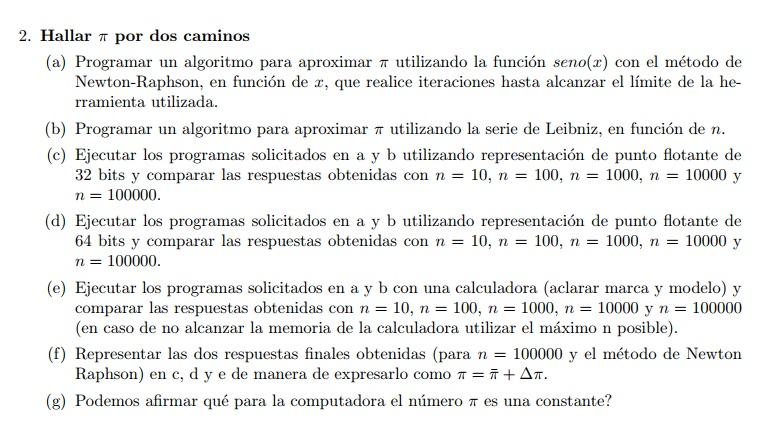

### (a) Algoritmo de aproximación de π por NR

In [ ]:
def newton_raphson_32b(f, f_derivada, tolerancia, max_iteraciones, semilla):
  '''
  Metodo Newton-Raphson truncado a 32 bits
  Devuelve un DataFrame con la historia de las iteraciones.
  f: funcion a analizar.
  f_derivada: derivada de la funcion f. No se debe anular en ningun momento.
  tolerancia: tolerancia maxima.
  max_iteraciones: maxima cantidad de iteraciones
  semilla: p_n inicial, debe estar cerca de la raiz original.
  '''
  p_anterior = np.float32(semilla)
  df = pd.DataFrame(columns=['pn', 'error'])

  i = 1

  while i < max_iteraciones:
    # Revisamos que la derivada no sea 0 o muy proxima a 0
    if abs(np.float32(f_derivada(p_anterior))) < LIMITE_CERO:
      print('La derivada se anula en la iteracion: ', i)
      return df
    p_candidata = np.float32(np.float32(p_anterior) - (np.float32(f(p_anterior)) / np.float32(f_derivada(p_anterior))))
    # Criterio de paro | p_n+1 - p_n | < tolerancia
    error = np.float32(abs(np.float32(p_candidata) - np.float32(p_anterior)))
    df = df.append({'pn': p_candidata, 'error': error}, ignore_index=True)
    if error < tolerancia:
      if error < LIMITE_CERO:
        df.iat[i - 1, 1] = 1E-15
      return df
    i += 1
    # Actualizo para poder comparar mas rapido en la sig. iteracion
    p_anterior = np.float32(p_candidata)
  
  print('No converge NR de 32b para estos parametros')
  return df

In [ ]:
def seno(x):
  return np.sin(x)

def coseno(x):
  return np.cos(x)

# La ejecucion por defecto es en 64-bits
newton_raphson(seno, coseno, 1E-30, 10, 2)
# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15

,pn,error
0,4.185039863261519,2.185039863261519
1,2.467893674514666,1.717146188746853
2,3.266186277569106,0.798292603054440
3,3.140943912317635,0.125242365251471
4,3.141592653680804,0.000648741363169
5,3.141592653589793,0.000000000091011
6,3.141592653589793,0.000000000000001


### (b) Algoritmo de aproximación de π con Leibniz



In [ ]:
def leibniz(n):
  '''
  Serie de Leibniz.
  n: cantidad de iteraciones a utilizar.
  '''
  sum = 0
  
  for i in range(n + 1):
    sum = sum + ((-1) ** i / (2 * i + 1))
  
  return sum

def leibniz_32b(n):
  '''
  Serie de Leibniz truncada a 32 bits.
  n: cantidad de iteraciones a utilizar.
  '''
  suma = 0
  for i in range(n + 1):
    suma = np.float32(suma) + np.float32(((-1) ** i / np.float32((2 * i + 1))))
  return np.float32(suma)

In [ ]:
leibniz(1000000)

0.7853984133971936

In [ ]:
leibniz_32b(1000000)

0.7853993

### (c) Ejecución de items 'a' y 'b' en 32-bits

In [ ]:
def seno(x):
  return np.sin(x)

def coseno(x):
  return np.cos(x)

print("Representacion de 32 bits: 7 digitos significativos")
print("Newton-Raphson")
display(newton_raphson_32b(seno, coseno, 1E-30, 10, 2))

print("Calculo de PI mediante Serie de Leibniz para n=10")
print(4 * leibniz_32b(n=10))

print("Calculo de PI mediante Serie de Leibniz para n=100")
print(4 * leibniz_32b(n=100))

print("Calculo de PI mediante Serie de Leibniz para n=1000")
print(4 * leibniz_32b(n=1000))

print("Calculo de PI mediante Serie de Leibniz para n=10000")
print(4 * leibniz_32b(n=10000))

print("Calculo de PI mediante Serie de Leibniz para n=100000")
print(4 * leibniz_32b(n=100000))

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 32-bits el error que corresponderia en esos casos seria 1E-7

Representacion de 32 bits: 7 digitos significativos
Newton-Raphson


,pn,error
0,4.185039997100830,2.185039997100830
1,2.467893362045288,1.717146635055542
2,3.266186475753784,0.798293113708496
3,3.140944004058838,0.125242471694946
4,3.141592741012573,0.000648736953735
5,3.141592741012573,0.000000000000001


Calculo de PI mediante Serie de Leibniz para n=10
3.2323157787323
Calculo de PI mediante Serie de Leibniz para n=100
3.1514930725097656
Calculo de PI mediante Serie de Leibniz para n=1000
3.1425914764404297
Calculo de PI mediante Serie de Leibniz para n=10000
3.1416985988616943
Calculo de PI mediante Serie de Leibniz para n=100000
3.141605854034424


### (d) Ejecución de items 'a' y 'b' en 64-bits

In [ ]:
print("Representacion de 64 bits: 15 digitos significativos")
print("Newton-Raphson")
display(newton_raphson(seno, coseno, 1E-30, 10, 2))

print("Calculo de PI mediante Serie de Leibniz para n=10")
print(4 * leibniz(n=10))

print("Calculo de PI mediante Serie de Leibniz para n=100")
print(4 * leibniz(n=100))

print("Calculo de PI mediante Serie de Leibniz para n=1000")
print(4 * leibniz(n=1000))

print("Calculo de PI mediante Serie de Leibniz para n=10000")
print(4 * leibniz(n=10000))

print("Calculo de PI mediante Serie de Leibniz para n=100000")
print(4 * leibniz(n=100000))

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15

Representacion de 64 bits: 15 digitos significativos
Newton-Raphson


,pn,error
0,4.185039863261519,2.185039863261519
1,2.467893674514666,1.717146188746853
2,3.266186277569106,0.798292603054440
3,3.140943912317635,0.125242365251471
4,3.141592653680804,0.000648741363169
5,3.141592653589793,0.000000000091011
6,3.141592653589793,0.000000000000001


Calculo de PI mediante Serie de Leibniz para n=10
3.232315809405594
Calculo de PI mediante Serie de Leibniz para n=100
3.1514934010709914
Calculo de PI mediante Serie de Leibniz para n=1000
3.1425916543395442
Calculo de PI mediante Serie de Leibniz para n=10000
3.1416926435905346
Calculo de PI mediante Serie de Leibniz para n=100000
3.1416026534897203


### (e) Ejecución de items 'a' y 'b' por calculadora

**Newton-Raphson**

Utilizando una semilla p=3

Cabe aclarar que la calculadora utilizada tiene implementado el método de Newton-Raphson utilizando la función "Solve"

Modelo de la calculadora: ***Casio fx-570ES PLUS***

pi_obtenido = 3.141592654

**Leibniz**
*   n = 10
 *  3.232315809
*  n=100
 *  3.151493401
*  n=1000
 *  3.142591654
*  n=10000
 *  No se llega a una solucion
*  n=100000
 *  No se llega a una solucion


### (f) Respuestas finales expresadas con el error


Usando criterio de la cátedra mayorando el primer digito distinto de 0 para el error y redondeado la medicion según cantidad del error obtenemos:

c) 32 bits

*   Leibniz (n=100000)
 *  3.1416058 $\pm$ 1E-7
*   Newton-Raphson
 *  3.1415927 $\pm$ 1E-7

d) 64 bits

*   Leibniz (n=100000)
 *  3.141602653489720 $\pm$ 5E-15
*   Newton-Raphson
 *  3.141592653589793 $\pm$ 1E-15

e) Calculadora

*   Leibniz (n=1000)
 *  3.142591654 $\pm$ 5E-9
*   Newton-Raphson
 *  3.141592654 $\pm$ 5E-9


### (g) Conclusión

Al momento de averiguar su valor, $ \pi $ nunca es una constante. Queda provado que su valor se ve afectado tanto por el método numérico de aproximación y/o por la precisión del sistema. Es importante entender estas dos ultimas cuestiones puesto que dependiendo la aplicación que le damos a $ \pi $, podemos ser más laxos o más estrictos. Sin embargo, para evitar estos inconvenientes, $ \pi $ suele ser una constante precargada para evitar realizar cálculos cuyo valor depende de lo mencionado anteriormente.

## 3) Búsqueda de raices

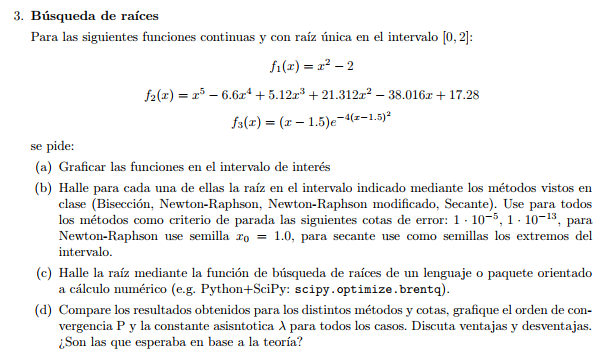

### Definición de funciones

In [ ]:
# Funcion 1
def f1(x):
  return (x**2) - 2

def f1_derivada(x):
  return  2*x

def f1_derivada_segunda(x):
  return 2

# Funcion 2
def f2(x):
  return (x**5) - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*x + 17.28

def f2_derivada(x):
  return 5*(x**4) - 26.4*(x**3)+ 15.36*(x**2)+ 42.624*x - 38.016

def f2_derivada_segunda(x):
  return 20*(x**3) - 79.2*(x**2) + 30.72*x + 42.624


# Funcion 3
def f3(x):
  return (x-1.5)*np.exp(-4*(x-1.5)**2)

def f3_derivada(x):
  return (-8*x+12.0)*(x-1.5)*np.exp(-4*(x-1.5)**2) + np.exp(-4*(x-1.5)**2)

def f3_derivada_segunda(x):
  return (-24*x+(x-1.5)*((8*x-12.0)**2)+36.0)*np.exp(-4*(x-1.5)**2)

### (a) Gráfico de funciones

#### Grafico de la funcion $ f_1(x) = x^2 − 2 $

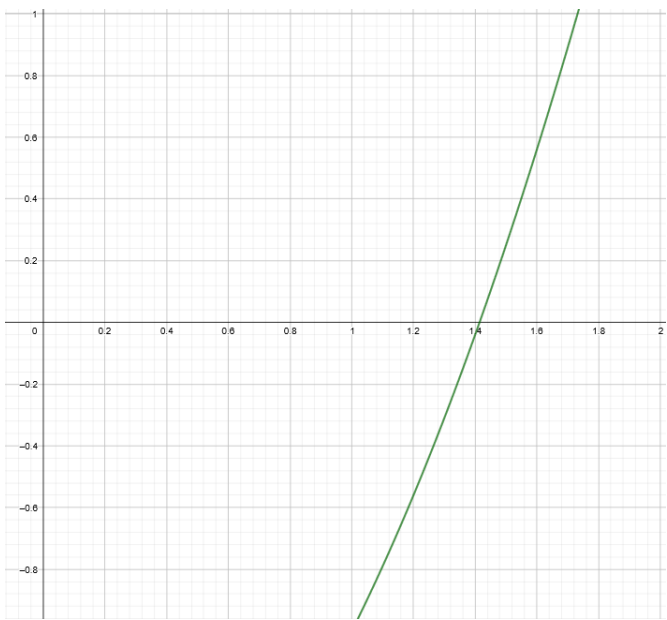

#### Grafico de la funcion $ f_2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28 $

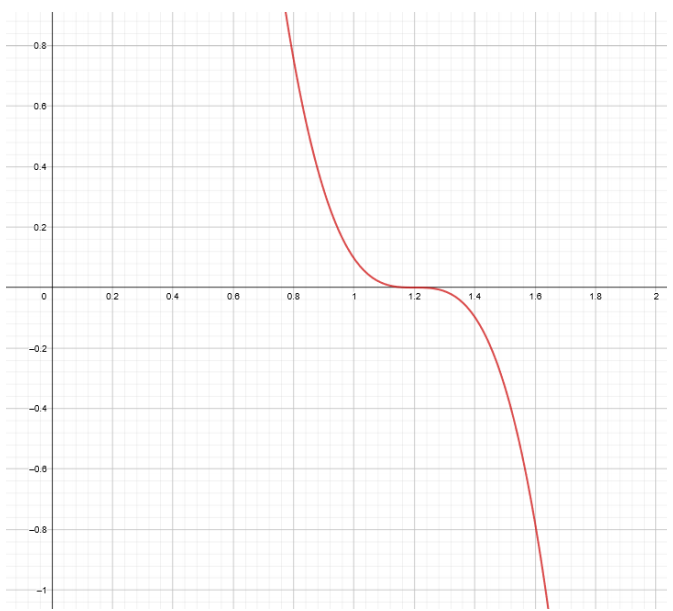

#### Grafico de la funcion $ f_3(x) = (x − 1.5)e^{−4(x−1.5)^2} $

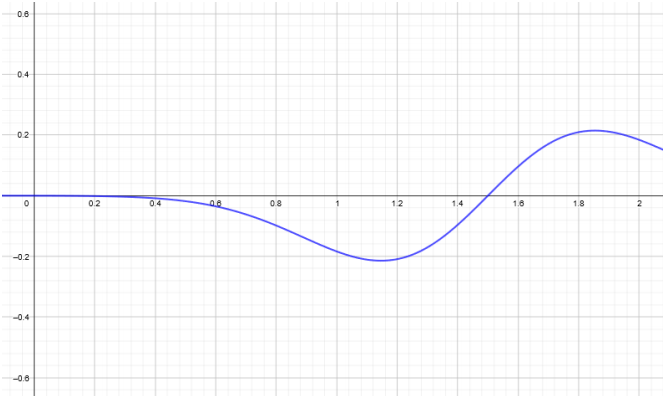

### (b) Búsqueda de raíces para las distintas funciones

#### Funcion 1: $ f1(x) = x^2 − 2 $

##### Biseccion

In [ ]:
# Bisección, f1(x) = x^2 − 2 , Cota de error: 1. 10^-5

historia = calcular_historia_orden_convergencia(biseccion(f1, 0, 2, 1E-5, 20))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.250000000000000,0.250000000000000,1,0.5
3,1.375000000000000,0.125000000000000,1,0.5
4,1.437500000000000,0.062500000000000,1,0.5
5,1.406250000000000,0.031250000000000,1,0.5
6,1.421875000000000,0.015625000000000,1,0.5
7,1.414062500000000,0.007812500000000,1,0.5
8,1.417968750000000,0.003906250000000,1,0.5
9,1.416015625000000,0.001953125000000,1,0.5


In [ ]:
# Bisección, f1(x) = x^2 − 2 
# Cota de error: 1E-13

historia = calcular_historia_orden_convergencia(biseccion(f1, 0, 2, 1E-13, 50))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.250000000000000,0.250000000000000,1,0.5
3,1.375000000000000,0.125000000000000,1,0.5
4,1.437500000000000,0.062500000000000,1,0.5
5,1.406250000000000,0.031250000000000,1,0.5
6,1.421875000000000,0.015625000000000,1,0.5
7,1.414062500000000,0.007812500000000,1,0.5
8,1.417968750000000,0.003906250000000,1,0.5
9,1.416015625000000,0.001953125000000,1,0.5


##### Newton-Raphson

In [ ]:
# Newton-Raphson, f1(x) = x^2 − 2 , Cota de error: 1. 10^-5
# Cota de error: 1E-5

historia = calcular_historia_orden_convergencia(newton_raphson(f1, f1_derivada, 1E-5, 20, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.500000000000000,0.500000000000000,None,None
1,1.416666666666667,0.083333333333333,None,None
2,1.414215686274510,0.002450980392157,1.96809928183911,0.32604359436195
3,1.414213562374690,0.000002123899820,1.99950895485293,0.352510779808821


In [ ]:
# Newton-Raphson, f1(x) = x^2 − 2 
# Cota de error: 1E-13

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(newton_raphson(f1, f1_derivada, 1E-13, 20, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.500000000000000,0.500000000000000,None,None
1,1.416666666666667,0.083333333333333,None,None
2,1.414215686274510,0.002450980392157,1.96809928183911,0.32604359436195
3,1.414213562374690,0.000002123899820,1.99950895485293,0.352510779808821
4,1.414213562373095,0.000000000001595,2.00001201234209,0.353578390400099
5,1.414213562373095,0.000000000000001,0.522934543018474,None


##### Newton-Raphson modificado

In [ ]:
# Newton-Raphson Modificado, f1(x) = x^2 − 2 
# Cota de error: 1E-5

historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f1, f1_derivada, f1_derivada_segunda, 1E-5, 10, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.333333333333333,0.333333333333333,None,None
1,1.411764705882353,0.078431372549020,None,None
2,1.414211438474870,0.002446732592517,2.39645104494731,None
3,1.414213562371500,0.000002123896630,2.032967930252,0.432566875300617


In [ ]:
# Newton-Raphson Modificado, f1(x) = x^2 − 2 
# Cota de error: 1E-13

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f1, f1_derivada, f1_derivada_segunda, 1E-13, 10, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.333333333333333,0.333333333333333,None,None
1,1.411764705882353,0.078431372549020,None,None
2,1.414211438474870,0.002446732592517,2.39645104494731,None
3,1.414213562371500,0.000002123896630,2.032967930252,0.432566875300617
4,1.414213562373095,0.000000000001595,2.00050351478718,0.355856781733765
5,1.414213562373095,0.000000000000001,0.522934598712305,None


##### Secante

In [ ]:
# Secante, f1(x) = x^2 − 2
# Cota de error: 1E-5

historia = calcular_historia_orden_convergencia(secante(f1, 0, 2, 1E-5, 10))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.333333333333333,0.333333333333333,None,None
2,1.428571428571429,0.095238095238095,1.14031399558996,0.333333333333333
3,1.413793103448276,0.014778325123153,1.48728728424022,0.488008151235358
4,1.414211438474870,0.000418335026594,1.91315961324174,None
5,1.414213562688870,0.000002124214000,1.48202603076267,0.215867520772816


In [ ]:
# Secante, f1(x) = x^2 − 2
# Cota de error: 1E-13

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(secante(f1, 0, 2, 1E-13, 10))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.333333333333333,0.333333333333333,None,None
2,1.428571428571429,0.095238095238095,1.14031399558996,0.333333333333333
3,1.413793103448276,0.014778325123153,1.48728728424022,0.488008151235358
4,1.414211438474870,0.000418335026594,1.91315961324174,None
5,1.414213562688870,0.000002124214000,1.48202603076267,0.215867520772816
6,1.414213562373095,0.000000000315775,1.66838567777176,0.920023362785747
7,1.414213562373095,0.000000000000001,1.43668638136461,None


#### Funcion 2: $ f_2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28 $

##### Biseccion

In [ ]:
# Bisección, f2(x) =  x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28 
# Cota de error: 1E-5

historia = calcular_historia_orden_convergencia(biseccion(f2, 0, 2, 1E-5, 20))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.250000000000000,0.250000000000000,1,0.5
3,1.125000000000000,0.125000000000000,1,0.5
4,1.187500000000000,0.062500000000000,1,0.5
5,1.218750000000000,0.031250000000000,1,0.5
6,1.203125000000000,0.015625000000000,1,0.5
7,1.195312500000000,0.007812500000000,1,0.5
8,1.199218750000000,0.003906250000000,1,0.5
9,1.201171875000000,0.001953125000000,1,0.5


In [ ]:
# Bisección, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-13

historia = calcular_historia_orden_convergencia(biseccion(f2, 0, 2, 1E-13, 50))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.250000000000000,0.250000000000000,1,0.5
3,1.125000000000000,0.125000000000000,1,0.5
4,1.187500000000000,0.062500000000000,1,0.5
5,1.218750000000000,0.031250000000000,1,0.5
6,1.203125000000000,0.015625000000000,1,0.5
7,1.195312500000000,0.007812500000000,1,0.5
8,1.199218750000000,0.003906250000000,1,0.5
9,1.201171875000000,0.001953125000000,1,0.5


##### Newton-Raphson

In [ ]:
# Newton-Raphson, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-5
historia = calcular_historia_orden_convergencia(newton_raphson(f2, f2_derivada, 1E-5, 40, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.067039106145254,0.067039106145254,None,None
1,1.111500862584999,0.044461756439745,None,None
2,1.141056567216819,0.029555704631820,0.994413517509378,0.653283521069616
3,1.160727268147251,0.019670700930432,0.997046353487153,0.658660065233122
4,1.173827768369526,0.013100500222275,0.998362610945746,0.661720154694918
5,1.182555936035558,0.008728167666032,0.999053099522079,0.663517620428929
6,1.188372391418123,0.005816455382564,0.999432317908136,0.664609308291566
7,1.192249031514232,0.003876640096110,0.999649608275695,0.665294352945416
8,1.194833025735818,0.002583994221586,0.999778820693216,0.665736963843597
9,1.196555499438189,0.001722473702371,0.99985804600295,0.666029900095165


In [ ]:
# Newton-Raphson, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-13

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(newton_raphson(f2, f2_derivada, 1E-13, 40, 1))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.067039106145254,0.067039106145254,None,None
1,1.111500862584999,0.044461756439745,None,None
2,1.141056567216819,0.029555704631820,0.994413517509378,0.653283521069616
3,1.160727268147251,0.019670700930432,0.997046353487153,0.658660065233122
4,1.173827768369526,0.013100500222275,0.998362610945746,0.661720154694918
5,1.182555936035558,0.008728167666032,0.999053099522079,0.663517620428929
6,1.188372391418123,0.005816455382564,0.999432317908136,0.664609308291566
7,1.192249031514232,0.003876640096110,0.999649608275695,0.665294352945416
8,1.194833025735818,0.002583994221586,0.999778820693216,0.665736963843597
9,1.196555499438189,0.001722473702371,0.99985804600295,0.666029900095165


##### Newton-Raphson modificado

In [ ]:
# Newton-Raphson Modificado, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-5

LIMITE_CERO = 1E-25 # De prueba para mostrar cumplimiento de criterio de paro, si aumento el limite de cero itera un poco mas

# Con semilla 1.3 converge con mas precision
historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f2, f2_derivada, f2_derivada_segunda, 1E-5, 10, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.199945787479401,0.100054212520599,None,None
1,1.200000799680849,0.000055012201448,None,None
2,1.200001198972154,0.000000399291305,0.656231882096013,None


In [ ]:
# Newton-Raphson Modificado, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-13

# Con semilla 1.3 converge un poco mas rapido y con mas precision
# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f2, f2_derivada, f2_derivada_segunda, 1E-13, 10, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.199945787479401,0.100054212520599,None,None
1,1.200000799680849,0.000055012201448,None,None
2,1.200001198972154,0.000000399291305,0.656231882096013,None
3,1.200001795701237,0.000000596729083,None,None
4,1.200002680394351,0.000000884693114,0.980102226233212,None
5,1.200002680394351,0.000000000000001,None,None


##### Secante

In [ ]:
# Secante, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-5

LIMITE_CERO = 1E-15
historia = calcular_historia_orden_convergencia(secante(f2, 0, 2, 1E-5, 40))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.475409836065575,0.524590163934425,None,None
1,1.452611812121220,0.022798023944355,None,None
2,1.375615183141658,0.076996628979561,None,None
3,1.336718258411820,0.038896924729838,None,None
4,1.302029414616354,0.034688843795466,None,None
5,1.277401409498030,0.024628005118325,None,None
6,1.258345986729271,0.019055422768759,0.748925820483124,0.305294351010631
7,1.244086150835950,0.014259835893321,1.13009003088734,None
8,1.233278489277362,0.010807661558588,0.956147007764051,0.629027463803131
9,1.225128158694203,0.008150330583159,1.01805673945765,0.818366572884756


In [ ]:
# Secante, f2(x) = x^5 − 6.6x^4 + 5.12x^3 + 21.312x^2 − 38.016x + 17.28
# Cota de error: 1E-13

# La ultima iteracion tiene error 0, no puede ser 0!
historia = calcular_historia_orden_convergencia(secante(f2, 0, 2, 1E-13, 50))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.475409836065575,0.524590163934425,None,None
1,1.452611812121220,0.022798023944355,None,None
2,1.375615183141658,0.076996628979561,None,None
3,1.336718258411820,0.038896924729838,None,None
4,1.302029414616354,0.034688843795466,None,None
5,1.277401409498030,0.024628005118325,None,None
6,1.258345986729271,0.019055422768759,0.748925820483124,0.305294351010631
7,1.244086150835950,0.014259835893321,1.13009003088734,None
8,1.233278489277362,0.010807661558588,0.956147007764051,0.629027463803131
9,1.225128158694203,0.008150330583159,1.01805673945765,0.818366572884756


#### Funcion 3: $ f_3(x) = (x − 1.5)e^{−4(x−1.5)^2} $

##### Biseccion

In [ ]:
# Bisección, f3(x) = (x − 1.5)exp(−4(x−1.5)^2) ,
# Cota de error: 1E-5

historia = calcular_historia_orden_convergencia(biseccion(f3, 0, 2, 1E-5, 20))
calcular_historia_constante_asintotica(historia)
# Interesante ver que en la segunda iteracion ya llega a la raiz, pero como no
# cumple el criterio de error, sigue iterando hasta llegar a cumplir el criterio de paro

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.750000000000000,0.250000000000000,1,0.5
3,1.875000000000000,0.125000000000000,1,0.5
4,1.937500000000000,0.062500000000000,1,0.5
5,1.968750000000000,0.031250000000000,1,0.5
6,1.984375000000000,0.015625000000000,1,0.5
7,1.992187500000000,0.007812500000000,1,0.5
8,1.996093750000000,0.003906250000000,1,0.5
9,1.998046875000000,0.001953125000000,1,0.5


In [ ]:
# Bisección, f3(x) = (x − 1.5)exp(−4(x−1.5)^2) ,
# Cota de error: 1E-13
historia = calcular_historia_orden_convergencia(biseccion(f3, 0, 2, 1E-13, 50))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.000000000000000,1.000000000000000,None,None
1,1.500000000000000,0.500000000000000,None,None
2,1.750000000000000,0.250000000000000,1,0.5
3,1.875000000000000,0.125000000000000,1,0.5
4,1.937500000000000,0.062500000000000,1,0.5
5,1.968750000000000,0.031250000000000,1,0.5
6,1.984375000000000,0.015625000000000,1,0.5
7,1.992187500000000,0.007812500000000,1,0.5
8,1.996093750000000,0.003906250000000,1,0.5
9,1.998046875000000,0.001953125000000,1,0.5


##### Newton-Raphson

In [ ]:
# Newton-Raphson, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-5

# Con 1 como semilla no converge o se anula la derivada
newton_raphson(f3, f3_derivada, 1E-5, 400, 1).tail()

La derivada en NR se anula en la iteracion:  36


,pn,error
30,-1.488497610745097,0.043058901474104
31,-1.530918368977042,0.042420758231945
32,-1.572728909286681,0.041810540309639
33,-1.613955163335319,0.041226254048638
34,-1.654621263806819,0.040666100471500


In [ ]:
# Que pasa si probamos con 1.3, semilla mas cerca? ---> Converge casi al instante
historia = calcular_historia_orden_convergencia(newton_raphson(f3, f3_derivada, 1E-5, 10, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.594117647058823,0.294117647058823,None,None
1,1.492821654209129,0.101295992849695,None,None
2,1.500002960343985,0.007181306134856,2.48286298322544,None
3,1.500000000000000,0.000002960343985,None,None


In [ ]:
# Newton-Raphson, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-13

# Pasa lo mismo que con la otra cota de error, casi se anula la derivada o no converge nunca al valor correcto.
newton_raphson(f3, f3_derivada, 1E-13, 400, 1).tail()

La derivada en NR se anula en la iteracion:  36


,pn,error
30,-1.488497610745097,0.043058901474104
31,-1.530918368977042,0.042420758231945
32,-1.572728909286681,0.041810540309639
33,-1.613955163335319,0.041226254048638
34,-1.654621263806819,0.040666100471500


In [ ]:
# Que pasa si acercamos la semilla a 1.3? ---> converge en al iteracion 5
historia = calcular_historia_orden_convergencia(newton_raphson(f3, f3_derivada, 1E-13, 400, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.594117647058823,0.294117647058823,None,None
1,1.492821654209129,0.101295992849695,None,None
2,1.500002960343985,0.007181306134856,2.48286298322544,None
3,1.500000000000000,0.000002960343985,None,None
4,1.500000000000000,0.000000000000001,None,None


##### Newton-Raphson modificado

In [ ]:
# Newton-Raphson Modificado, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-5

# Con semilla = 1 se anula el denominador o no converge nunca al valor correcto
newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-5, 10, 1)

El denominador en NR modificado se anula en la iteracion:  5


,pn,error
0,0.833333333333333,0.166666666666667
1,0.459349593495935,0.373983739837398
2,-0.365926089169031,0.825275682664966
3,-2.102513978033765,1.736587888864734


In [ ]:
# Que pasa si usamos semilla mas cerca? 1.3 por ejemplo
historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-5, 10, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.403030303030303,0.103030303030303,None,None
1,1.486431596392994,0.083401293362691,None,None
2,1.499960091346067,0.013528494953073,None,None
3,1.499999999998983,0.000039908652916,None,None
4,1.500000000000000,0.000000000001017,None,None


In [ ]:
# Newton-Raphson Modificado, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-13

# Con semilla = 1 se anula el denominador o no converge nunca al valor correcto
newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-13, 10, 1)

El denominador en NR modificado se anula en la iteracion:  5


,pn,error
0,0.833333333333333,0.166666666666667
1,0.459349593495935,0.373983739837398
2,-0.365926089169031,0.825275682664966
3,-2.102513978033765,1.736587888864734


In [ ]:
# Que pasa si usamos semilla mas cerca? 1.3 por ej

# En la ultima iteracion el p_n NO cambia y el error es 0 ---> nunca puede ser 0 el error.
# En arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15
historia = calcular_historia_orden_convergencia(newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-13, 10, 1.3))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.403030303030303,0.103030303030303,None,None
1,1.486431596392994,0.083401293362691,None,None
2,1.499960091346067,0.013528494953073,None,None
3,1.499999999998983,0.000039908652916,None,None
4,1.500000000000000,0.000000000001017,None,None
5,1.500000000000000,0.000000000000001,0.396023203628658,None


##### Secante

In [ ]:
# Secante, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-5

# Se anula el denominador o no converge nunca al valor correcto con esas semillas
secante(f3, 0, 2, 1E-5, 400).tail()

El denominador en secante se anula en la iteracion:  40


,pn,error
34,-1.375263225324295,0.031017919830983
35,-1.405934480737602,0.030671255413307
36,-1.436270607361082,0.030336126623480
37,-1.466282509853517,0.030011902492435
38,-1.495980509441315,0.029697999587797


In [ ]:
# Si cambiamos las semillas mas cerca, con p0 = 1.3 y p1 = 1.6 --> converge rapido
historia = calcular_historia_orden_convergencia(secante(f3, 1.3, 1.6, 1E-5, 10))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.491846715911801,0.108153284088199,None,None
1,1.500304640654478,0.008457924742677,None,None
2,1.499999922011865,0.000304718642613,1.30411657699102,0.153811441257446
3,1.500000000000029,0.000000077988163,2.48853952436373,None


In [ ]:
# Secante, f3(x) = (x − 1.5)exp(−4(x−1.5)^2)
# Cota de error: 1E-13

# Se anula de nuevo o nunca converge, las semillas no son buenas
secante(f3, 0, 2, 1E-13, 400).tail()

El denominador en secante se anula en la iteracion:  40


,pn,error
34,-1.375263225324295,0.031017919830983
35,-1.405934480737602,0.030671255413307
36,-1.436270607361082,0.030336126623480
37,-1.466282509853517,0.030011902492435
38,-1.495980509441315,0.029697999587797


In [ ]:
# Si cambiamos las semillas a algunas mas cercanas 1.3 y 1.6
historia = calcular_historia_orden_convergencia(secante(f3, 1.3, 1.6, 1E-13, 10))
calcular_historia_constante_asintotica(historia)

,pn,error,alfa,lambda
0,1.491846715911801,0.108153284088199,None,None
1,1.500304640654478,0.008457924742677,None,None
2,1.499999922011865,0.000304718642613,1.30411657699102,0.153811441257446
3,1.500000000000029,0.000000077988163,2.48853952436373,None
4,1.500000000000000,0.000000000000029,1.79061172084433,0.154170155623322


### (c) Búsqueda de raíces con paquete orientado a cálculo numérico

In [ ]:
from scipy import optimize

root = optimize.brentq(f1, 0, 2)
print('Raiz primer funcion Brent: {} +- {}'.format(root, 0.0000000000000001))
root = optimize.bisect(f1, 0, 2)
print('Raiz primer funcion Biseccion: {} +- {}'.format(root, 0.0000000000000001))
root = optimize.newton(f1, 1)
print('Raiz primer funcion Newton-Raphson: {} +- {}'.format(root, 0.000000000000001))
print('\n')

root = optimize.brentq(f2, 0, 2)
print('Raiz segunda funcion Brent: {} +- {}'.format(root, 0.0000000000000001))
root = optimize.bisect(f2, 0, 2)
print('Raiz segunda funcion Biseccion: {} +- {}'.format(root, 0.0000000000000001))
root = optimize.newton(f2, 1)
print('Raiz segunda funcion Newton-Raphson: {} +- {}'.format(root, 0.0000000000000001))
print('\n')

root = optimize.brentq(f3, 0, 2)
print('Raiz tercera funcion Brent: {} +- {}'.format(root, 0.0000000000000001))
root = optimize.bisect(f3, 0, 2)
print('Raiz tercera funcion Biseccion: {} +- {}'.format(root, 0.000000000000001))
root = optimize.newton(f3, 1.3) # Con 1 como raiz tambien falla
print('Raiz tercera funcion Newton-Raphson: {} +- {}'.format(root, 0.000000000000001))

Raiz primer funcion Brent: 1.4142135623731364 +- 1e-16
Raiz primer funcion Biseccion: 1.4142135623715149 +- 1e-16
Raiz primer funcion Newton-Raphson: 1.414213562373095 +- 1e-15


Raiz segunda funcion Brent: 1.2000081652661798 +- 1e-16
Raiz segunda funcion Biseccion: 1.2000045776367188 +- 1e-16
Raiz segunda funcion Newton-Raphson: 1.2000066214794778 +- 1e-16


Raiz tercera funcion Brent: 1.5000000000000198 +- 1e-16
Raiz tercera funcion Biseccion: 1.5 +- 1e-15
Raiz tercera funcion Newton-Raphson: 1.5 +- 1e-15


### (d) Comparación de orden de convergencia, constante asintótica y de raices

#### $ f_1(x) $

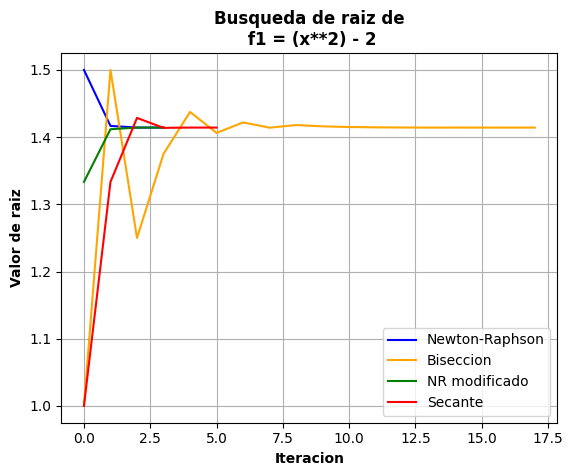

In [ ]:
# Graficos, ejemplo para f1 graficando la busqueda de raices

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f1, f1_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f1, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f1, f1_derivada, f1_derivada_segunda, 1E-5, 10, 1))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f1, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)


plt.figure(dpi=100)
plt.plot(historia_nr['pn'].index, historia_nr['pn'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['pn'].index, historia_bisec['pn'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['pn'].index, historia_nrm['pn'].values, label='NR modificado', color='green')
plt.plot(historia_sec['pn'].index, historia_sec['pn'].values, label='Secante', color='red')
plt.title("Busqueda de raiz de\n f1 = (x**2) - 2", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Valor de raiz', weight='bold')
plt.show()

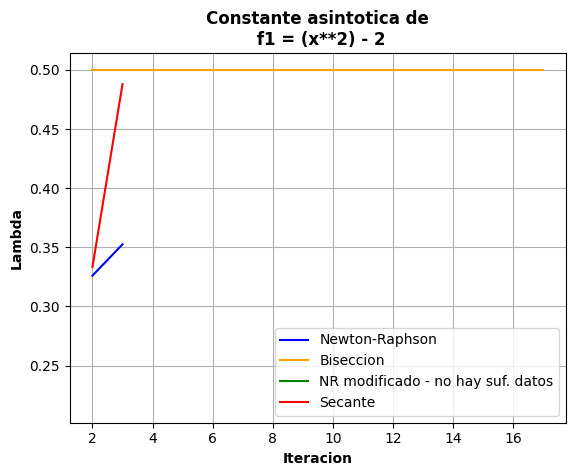

In [ ]:
# Graficos, ejemplo para f1 graficando el lambda (constante asintotica)
historia_nr = calcular_historia_orden_convergencia(newton_raphson(f1, f1_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f1, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f1, f1_derivada, f1_derivada_segunda, 1E-5, 10, 1))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f1, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)


plt.figure(dpi=100)
plt.plot(historia_nr['lambda'].index, historia_nr['lambda'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['lambda'].index, historia_bisec['lambda'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['lambda'].index, historia_nrm['lambda'].values, label='NR modificado - no hay suf. datos', color='green')
plt.plot(historia_sec['lambda'].index, historia_sec['lambda'].values, label='Secante', color='red')
plt.title("Constante asintotica de\n f1 = (x**2) - 2", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Lambda', weight='bold')
plt.show()

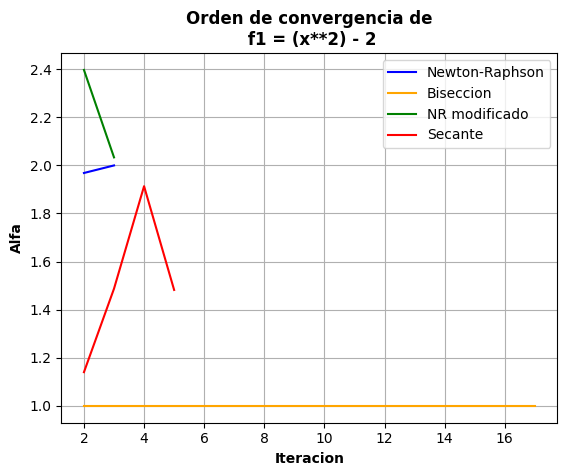

In [ ]:
historia_nr = calcular_historia_orden_convergencia(newton_raphson(f1, f1_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f1, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f1, f1_derivada, f1_derivada_segunda, 1E-5, 10, 1))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f1, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['alfa'].index, historia_nr['alfa'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['alfa'].index, historia_bisec['alfa'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['alfa'].index, historia_nrm['alfa'].values, label='NR modificado', color='green')
plt.plot(historia_sec['alfa'].index, historia_sec['alfa'].values, label='Secante', color='red')
plt.title("Orden de convergencia de\n f1 = (x**2) - 2", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Alfa', weight='bold')
plt.show()

#### $ f_2(x) $

El denominador en NR modificado se anula en la iteracion:  3


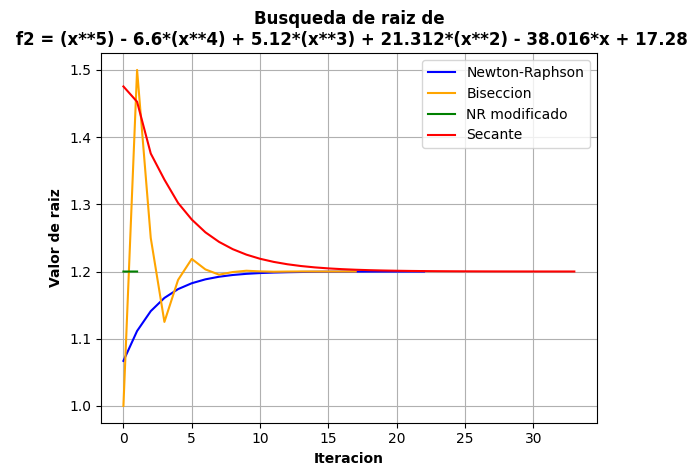

In [ ]:
# Graficos, ejemplo para f2 graficando la busqueda de raices

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f2, f2_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f2, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f2, f2_derivada, f2_derivada_segunda, 1E-5, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f2, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['pn'].index, historia_nr['pn'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['pn'].index, historia_bisec['pn'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['pn'].index, historia_nrm['pn'].values, label='NR modificado', color='green')
plt.plot(historia_sec['pn'].index, historia_sec['pn'].values, label='Secante', color='red')
plt.title("Busqueda de raiz de\n f2 = (x**5) - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*x + 17.28", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Valor de raiz', weight='bold')
plt.show()

El denominador en NR modificado se anula en la iteracion:  3


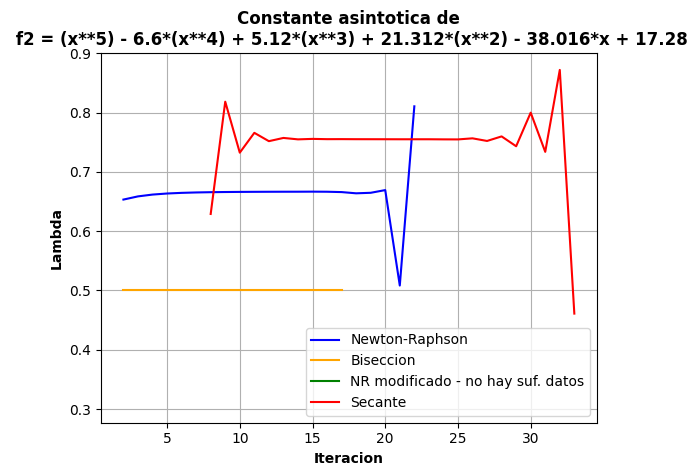

In [ ]:
# Graficos, ejemplo para f2 graficando el lambda (constante asintotica)

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f2, f2_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f2, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f2, f2_derivada, f2_derivada_segunda, 1E-5, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f2, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['lambda'].index, historia_nr['lambda'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['lambda'].index, historia_bisec['lambda'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['lambda'].index, historia_nrm['lambda'].values, label='NR modificado - no hay suf. datos', color='green')
plt.plot(historia_sec['lambda'].index, historia_sec['lambda'].values, label='Secante', color='red')
plt.title("Constante asintotica de\n f2 = (x**5) - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*x + 17.28", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Lambda', weight='bold')
plt.show()

El denominador en NR modificado se anula en la iteracion:  3


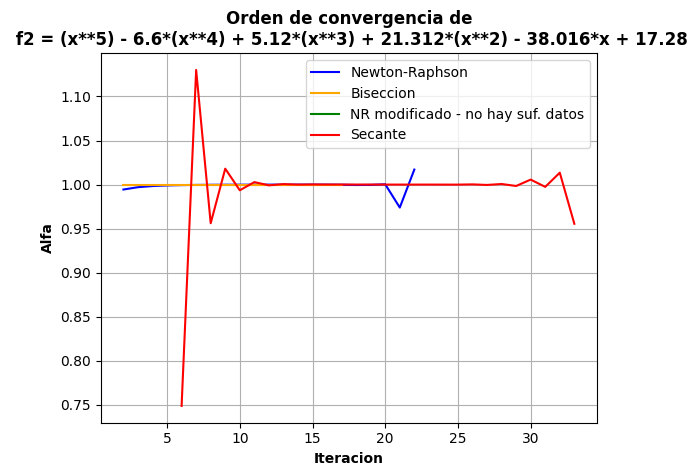

In [ ]:
# Graficos, ejemplo para f2 graficando el alfa (orden de covergencia)

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f2, f2_derivada, 1E-5, 40, 1))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f2, 0, 2, 1E-5, 20))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f2, f2_derivada, f2_derivada_segunda, 1E-5, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f2, 0, 2, 1E-5, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['alfa'].index, historia_nr['alfa'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['alfa'].index, historia_bisec['alfa'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['alfa'].index, historia_nrm['alfa'].values, label='NR modificado - no hay suf. datos', color='green')
plt.plot(historia_sec['alfa'].index, historia_sec['alfa'].values, label='Secante', color='red')
plt.title("Orden de convergencia de\n f2 = (x**5) - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*x + 17.28", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Alfa', weight='bold')
plt.show()

#### $ f_3(x) $

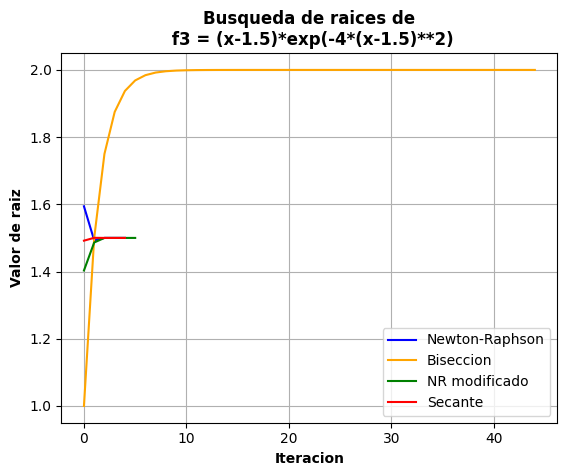

In [ ]:
# Graficos, ejemplo para f3 graficando la busqueda de raices

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f3, f3_derivada, 1E-13, 40, 1.3))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f3, 0, 2, 1E-13, 50))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-13, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f3, 1.3, 1.6, 1E-13, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['pn'].index, historia_nr['pn'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['pn'].index, historia_bisec['pn'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['pn'].index, historia_nrm['pn'].values, label='NR modificado', color='green')
plt.plot(historia_sec['pn'].index, historia_sec['pn'].values, label='Secante', color='red')
plt.title("Busqueda de raices de\n f3 = (x-1.5)*exp(-4*(x-1.5)**2)", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Valor de raiz', weight='bold')
plt.show()

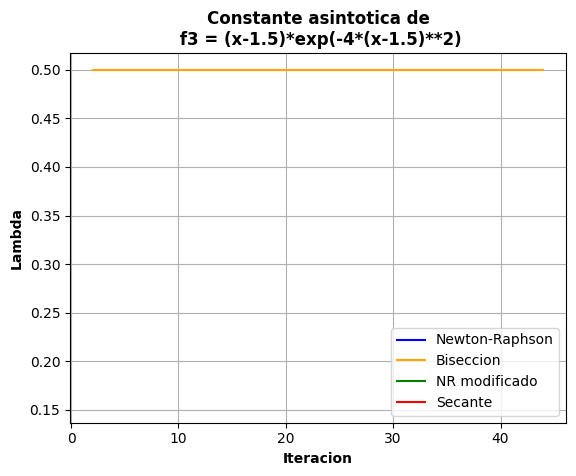

In [ ]:
# Graficos, ejemplo para f3 graficando el lambda (constante asintotica)

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f3, f3_derivada, 1E-13, 40, 1.3))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f3, 0, 2, 1E-13, 50))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-13, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f3, 1.3, 1.6, 1E-13, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['lambda'].index, historia_nr['lambda'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['lambda'].index, historia_bisec['lambda'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['lambda'].index, historia_nrm['lambda'].values, label='NR modificado', color='green')
plt.plot(historia_sec['lambda'].index, historia_sec['lambda'].values, label='Secante', color='red')
#plt.scatter(historia_sec['lambda'].index, historia_sec['lambda'].values, label='Secante', color='red')
plt.title("Constante asintotica de\n f3 = (x-1.5)*exp(-4*(x-1.5)**2)", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Lambda', weight='bold')
plt.show()

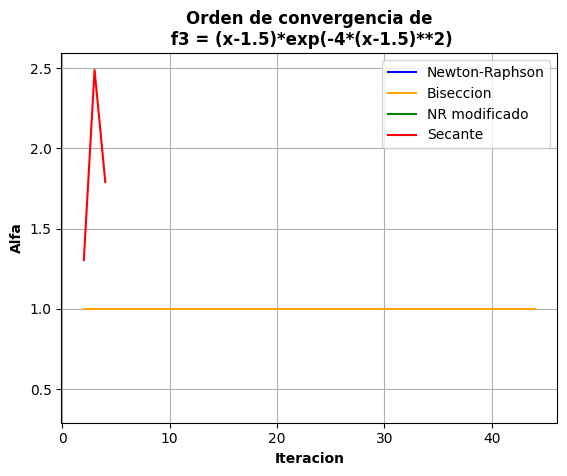

In [ ]:
# Graficos, ejemplo para f3 graficando el alfa (orden de covergencia)

historia_nr = calcular_historia_orden_convergencia(newton_raphson(f3, f3_derivada, 1E-13, 40, 1.3))
historia_nr = calcular_historia_constante_asintotica(historia_nr)
historia_bisec = calcular_historia_orden_convergencia(biseccion(f3, 0, 2, 1E-13, 50))
historia_bisec = calcular_historia_constante_asintotica(historia_bisec)
historia_nrm = calcular_historia_orden_convergencia(newton_raphson_modificado(f3, f3_derivada, f3_derivada_segunda, 1E-13, 10, 1.3))
historia_nrm = calcular_historia_constante_asintotica(historia_nrm)
historia_sec = calcular_historia_orden_convergencia(secante(f3, 1.3, 1.6, 1E-13, 40))
historia_sec = calcular_historia_constante_asintotica(historia_sec)

plt.figure(dpi=100)
plt.plot(historia_nr['alfa'].index, historia_nr['alfa'].values , label='Newton-Raphson', color='blue')
plt.plot(historia_bisec['alfa'].index, historia_bisec['alfa'].values , label='Biseccion', color='orange')
plt.plot(historia_nrm['alfa'].index, historia_nrm['alfa'].values, label='NR modificado', color='green')
plt.plot(historia_sec['alfa'].index, historia_sec['alfa'].values, label='Secante', color='red')
plt.title("Orden de convergencia de\n f3 = (x-1.5)*exp(-4*(x-1.5)**2)", weight='bold')
plt.xlabel('Iteracion', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Alfa', weight='bold')
plt.show()

#### Conclusiones

- En $ f_1(x) $ los resultados obtenidos con las funciones programadas son congruentes con estos últimos, viendo que la convergencia más rápida se encontró con los métodos de Newton-Raphson, luego el método de la secante y por último el método de bisección. Podemos ver como los valores de P están de acuerdo con lo que se esperaba en base a la teoría, mostrando una convergencia lineal para la bisección, una casi cuadrática para los métodos Newton-Raphson y Newton-Raphson modificado y una convergencia supra-lineal para el método de la secante. Sin embargo, al calcular la constante asintotica en Newton-Raphson se ve que se encuentra mas alejada de 0.5 que la constante del método de la secante.

- En $ f_2(x) $ el método que llega a la raíz mas rápido es el de NR modificado (llegando al límite de la arquitectura), seguido de bisección, NR y secante. Es llamativo que bisección le gane a NR en cuanto a la menor cantidad de iteraciones necesarias y se lo atribuimos a que la función tiene su raiz en una parte 'plana' haciendo que con la semilla inicial le cueste aproximarse a la raíz real. En cuanto a P, bisección coincide con el valor teórico pero secante y NR tienen una convergencia casi lineal y tiene sentido ya que les tomó 33 y 22 iteraciones respectivamente. Por su lado, la constante asintótica coincide para bisección y secante pero no para NR. Un caso particular que notamos en esta función es que si modificamos el límite de cero a, por ejemplo, 1E-25 vemos que el método de NR modificado logra un par mas de iteraciones logrando cumplir el criterio de paro, situación que con el límite de 1E-15 no lo hacia debido a que se consideraba como que la derivada se anulaba en un determinado punto.

- En $ f_3(x) $ notamos que para el método de bisección llega al valor correcto de la raíz en la segunda iteración, pero como el criterio de corte es la diferencia entre iteraciones, el algoritmo sigue iterando hasta llegar al criterio de paro devolviendo una raiz erronea. En cuanto a $ P $ y $ \lambda $ no se grafican no se grafican los casos de NR y NR modificado ya que no dan valores representativos.





A modo de conclusión de la parte 3 de este trabajo práctico, se destaca que la convergencia al resultado con la tolerancia dada con menos iteraciones fue utilizando el método de Newton-Raphson modificado, de acuerdo a la teoría.
Algo interesante que observamos fue que el método de la bisección converge siempre en la misma cantidad de iteraciones para una cota de error dada sin importar la función, comprobando en la práctica uno de los teoremas del método.
Además, se encontraron dificultades para hallar el orden de convergencia P (α) y la constante asintótica λ. Estimamos que una posible fuente de este inconveniente es el error de redondeo proveniente del uso de notación de punto flotante. Además, al trabajar con números muy cercanos entre si, el error tiende a aumentar al dividir por un número muy pequeño o multiplicando por uno
muy grande, siendo estos cálculos necesarios para encontrar los valores que buscamos. Este error se podría llegar a reducir anidando las funciones, lo que provocaría una reducción en la cantidad de operaciones a realizar en algunos casos. Otra fuente de error es que obtenemos el orden de convergencia vía una estimación y no vía un cálculo directo, es decir, le agregamos una incerteza más a un resultado con ya mucho error.

Para calcular el valor de la constante asintótica lambda decidimos utilizar el valor de P correspondiente a la iteración actual (es decir, a la fila actual del DataFrame) y no el ultimo órden convergencia obtenido. Para algunas de las funciones dadas, el ultimo orden de convergencia obtenido se alejaba considerablemente del resto de los órdenes convirtiendolo en un valor no representativo.

Con respecto a la búsqueda de P y λ, teniendo en cuenta los posibles errores de cálculo despreciamos los valores claramente erróneos, pudiendo llegar a valores algo congruentes con la teoría. Para el orden de convergencia, despreciamos valores obtenidos que fueran mayores a 2.5 y menores a 0.3. Para la constante asintótica lambda, despreciamos valores mayores a 1 y menores a 0.15. Por esta razón, algunos de los gráficos quedaron sin información para no mostrar resultados erróneos.

Sobre la función 3, con los métodos NR y NR modificado, elegimos modificar la semilla inicial a 1.3, ya que observamos que con la semilla dada era imposible la convergencia (mediante iteraciones encontramos que el intervalo de convergencia es aproximadamente 1.26 < semilla < 1.74). Nos pareció la decisión más adecuada elegir una semilla arbitrariamente dentro del intervalo de convergencia hallado para de esa manera mostrar el funcionamiento completo de los métodos.

Por último, en algunos casos de Newton-Raphson y NR modificado llegamos a que en la última y anteúltima iteración no se nota un cambio en la raíz candidata produciendo que en la última iteración se llegue con un error de 0. Esto se debe a que el cambio entre raices candidatas es tan pequeño que la arquitectura en donde se ejecuta este notebook no permite representar tal diferencia. En este caso, a estar en una arquitectura de 64-bits el error que corresponderia en esos casos seria 1E-15. Una forma posible de solucionar esto es cambiar el método de cálculo del error a $ E_{n+1} = \frac{1}{2}\frac{f''(p)}{f'(p)}E_n ^2 $